<a href="https://colab.research.google.com/github/futartup/S11-assignment/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Add the current path to system path so that it can find the custom libraries

In [0]:
import os, sys
if '/content/drive/My Drive/Colab Notebooks/S8' not in sys.path:
  sys.path.append('/content/drive/My Drive/Colab Notebooks/S8')

# Import all the custom and inbuilt modules

data  drive  sample_data


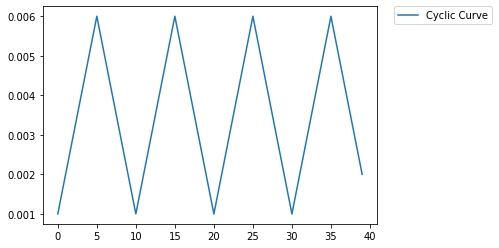

  pip install torch-lr-finder -v --global-option="amp"


In [3]:
!ls 
try:
  import ipynb
except:
  !pip install ipynb --upgrade
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
import torch.optim as optim
import os, sys

from torchsummary import summary
import torch.optim as optim
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms.functional as F



# custom apis
from ipynb.fs.full.transform_train_test_loader import *
import ipynb.fs.full.conf as conf

from ipynb.fs.full.train import train_model
from ipynb.fs.full.copy_test import test_model
from ipynb.fs.full.utils import *
from ipynb.fs.full.lr_finder import *
# import gradcam 
from ipynb.fs.full.resnet_gradcam import *

# The model related code. Load the model from the conf file. 

In [0]:

if conf.custom_model['use']:
  #use custom model
  pass
elif conf.inbuilt_model['use']:
  from ipynb.fs.full.model.pytorch_resnet import *
  from ipynb.fs.full.model.resnet import *
  from ipynb.fs.full.model.s11_resnet_dnn import NetS11
  model_type = conf.inbuilt_model['model']
  if model_type == 'DenseNet':
    net = globals()[model_type](growthRate=12, depth=50, reduction=0.5,
                            bottleneck=True, nClasses=10)
  else:
    net = globals()[model_type]()
  #net = torchvision.models.resnet18(pretrained=False)

# Model Summary

In [5]:
use_cuda = torch.cuda.is_available()
if use_cuda:
  torch.cuda.manual_seed(conf.seed)
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

# Test and Train loader

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), **conf.optimizer_parameters)

data_loader_obj = DataLoaderA(conf, './data')
train_loader = data_loader_obj.get_train_loader()
test_loader = data_loader_obj.get_test_loader()


Files already downloaded and verified


## Scheduler Call

In [0]:
scheduler = conf.scheduler(optimizer, steps_per_epoch=len(train_loader), **conf.scheduler_parameters)

# Visualize the transformed images

In [0]:
classes = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck",
}

# images, labels = next(iter(train_loader))
# images = images.numpy()  # convert images to numpy for display

# # plot the images in the batch, along with the corresponding labels
# fig = plt.figure(figsize=(32, 32))
# # display 20 images
# for idx in np.arange(20):
#     ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks=[], yticks=[])
#     ax.imshow(images[idx].transpose((1, 2, 0)))
#     ax.set_title(classes[labels[idx].item()])

# Find the best LR

In [0]:
if conf.use_lr_finder_train:
  lr_finder = LRFinder(model, optimizer, criterion, device) #implemented LRFinder for SGD
  lr_finder.range_test(train_loader, end_lr=100, num_iter=400, step_mode="exp")
  lr_finder.plot() # to inspect the loss-learning rate graph
  #print(lr_finder.history) # see the history
  best_loss = lr_finder.best_loss
  print(min(lr_finder.history['lr']))
  print(lr_finder.history['lr'][lr_finder.history['loss'].index(best_loss)])
  optimizer.lr = lr_finder.history['lr'][lr_finder.history['loss'].index(best_loss)]
  lr_finder.reset()



#scheduler = StepLR(optimizer, lr_step_size, gamma=0.1)

# Test and Train

In [10]:
# Containers to plot the graph for test and train
test_losses = []
test_acc = []
train_losses = []
train_acc = []

lr_array = []

# Containers for correctly and falsely predicted images
correct_predicted = []
false_predicted = []

# Number of images to display which are correct and false predicted
sample_count = 25

# TODO: Take the end epoch value from conf file 
for e in range(1, conf.epochs):
    print("epoch no: {}\n".format(e))
    print("Learning rate : {}\n".format(scheduler.get_lr()))
    train_model(model, device, 
                train_loader, optimizer, 
                criterion, e,
                train_losses, train_acc, lr_array, scheduler)
    #scheduler.step()
    test_loss = test_model(model, device, 
                           test_loader, criterion, 
                           2, sample_count,
                           correct_predicted, false_predicted, 
                           test_losses, test_acc)
    
    print("===========================================================\n")



  0%|          | 0/98 [00:00<?, ?it/s]

epoch no: 1

Learning rate : [0.0004]



/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=29.733142852783203 Batch_id=97 Accuracy=33.66: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4128, Accuracy: 4956/10000 (49.56%)


epoch no: 2

Learning rate : [0.002404260758414998]



Loss=24.744890213012695 Batch_id=97 Accuracy=55.85: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3618, Accuracy: 5413/10000 (54.13%)


epoch no: 3

Learning rate : [0.004408521516829996]



Loss=16.66710662841797 Batch_id=97 Accuracy=66.14: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0497, Accuracy: 6538/10000 (65.38%)


epoch no: 4

Learning rate : [0.006412782275244994]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0902, Accuracy: 6603/10000 (66.03%)


epoch no: 5

Learning rate : [0.00841704303365999]



Loss=6.971700668334961 Batch_id=97 Accuracy=66.42: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.4688, Accuracy: 4388/10000 (43.88%)


epoch no: 6

Learning rate : [0.009890519145408163]



Loss=6.273036956787109 Batch_id=97 Accuracy=66.87: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8689, Accuracy: 7051/10000 (70.51%)


epoch no: 7

Learning rate : [0.009369687895408164]



Loss=5.032875061035156 Batch_id=97 Accuracy=72.84: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8582, Accuracy: 7065/10000 (70.65%)


epoch no: 8

Learning rate : [0.008848856645408163]



Loss=4.031421661376953 Batch_id=97 Accuracy=75.74: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9896, Accuracy: 6807/10000 (68.07%)


epoch no: 9

Learning rate : [0.008328025395408164]



Loss=3.6851773262023926 Batch_id=97 Accuracy=77.68: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7608, Accuracy: 7387/10000 (73.87%)


epoch no: 10

Learning rate : [0.007807194145408163]



Loss=3.375563621520996 Batch_id=97 Accuracy=79.02: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7319, Accuracy: 7522/10000 (75.22%)


epoch no: 11

Learning rate : [0.007286362895408164]



Loss=3.058258533477783 Batch_id=97 Accuracy=80.62: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6871, Accuracy: 7680/10000 (76.80%)


epoch no: 12

Learning rate : [0.006765531645408164]



Loss=2.728548526763916 Batch_id=97 Accuracy=82.22: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6122, Accuracy: 7938/10000 (79.38%)


epoch no: 13

Learning rate : [0.006244700395408163]



Loss=2.7328522205352783 Batch_id=97 Accuracy=83.08: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7096, Accuracy: 7688/10000 (76.88%)


epoch no: 14

Learning rate : [0.005723869145408163]



Loss=2.611768960952759 Batch_id=97 Accuracy=84.32: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5329, Accuracy: 8176/10000 (81.76%)


epoch no: 15

Learning rate : [0.005203037895408164]



Loss=2.4860763549804688 Batch_id=97 Accuracy=85.47: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5595, Accuracy: 8127/10000 (81.27%)


epoch no: 16

Learning rate : [0.004682206645408163]



Loss=2.2915074825286865 Batch_id=97 Accuracy=86.51: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5779, Accuracy: 8096/10000 (80.96%)


epoch no: 17

Learning rate : [0.004161375395408163]



Loss=2.2292609214782715 Batch_id=97 Accuracy=87.48: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5768, Accuracy: 8033/10000 (80.33%)


epoch no: 18

Learning rate : [0.0036405441454081637]



Loss=2.1397814750671387 Batch_id=97 Accuracy=88.94: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5151, Accuracy: 8231/10000 (82.31%)


epoch no: 19

Learning rate : [0.0031197128954081636]



Loss=2.080061435699463 Batch_id=97 Accuracy=90.28: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5489, Accuracy: 8189/10000 (81.89%)


epoch no: 20

Learning rate : [0.0025988816454081626]



Loss=1.9172816276550293 Batch_id=97 Accuracy=91.44: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4499, Accuracy: 8493/10000 (84.93%)


epoch no: 21

Learning rate : [0.0020780503954081642]



Loss=1.8262145519256592 Batch_id=97 Accuracy=93.13: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4808, Accuracy: 8499/10000 (84.99%)


epoch no: 22

Learning rate : [0.0015572191454081633]



Loss=1.6930501461029053 Batch_id=97 Accuracy=94.76: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4532, Accuracy: 8584/10000 (85.84%)


epoch no: 23

Learning rate : [0.0010363878954081623]



Loss=1.5727860927581787 Batch_id=97 Accuracy=96.44: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]



Test set: Average loss: 0.4088, Accuracy: 8738/10000 (87.38%)




# *GradCam* for Resnet for falsely predicted images


In [0]:
# images = [x['image'].unsqueeze(0) for x in false_predicted]
# inputs = [i.to(device) for i in images]
# gradcamof(model, inputs, classes)

# Correctly predicted images

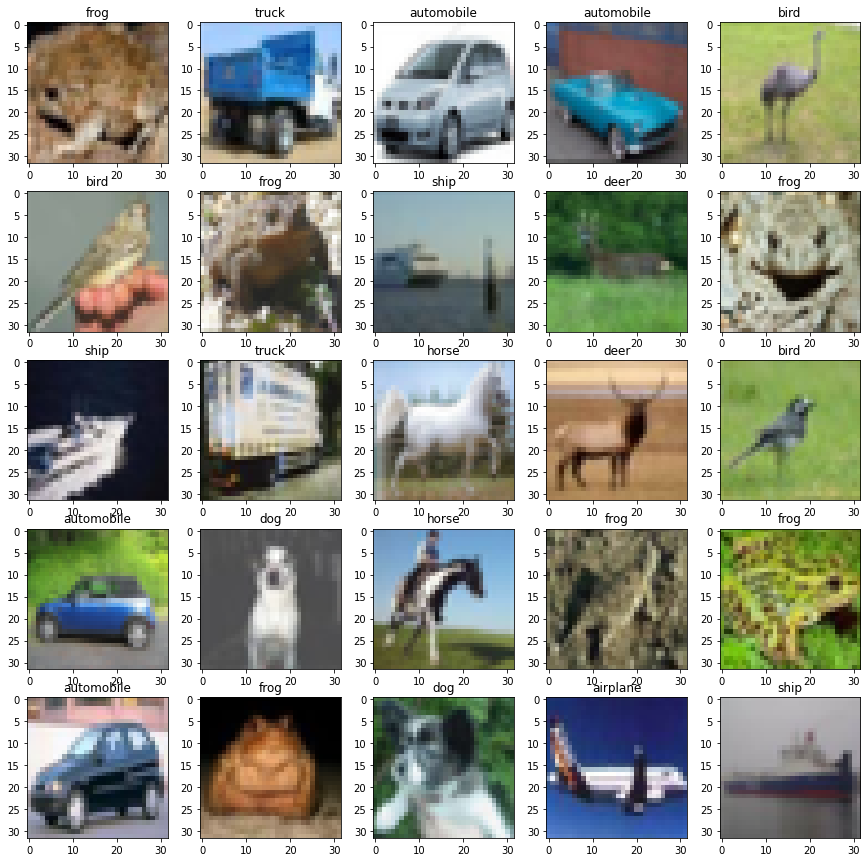

In [12]:
matplotlib_imshow(classes, correct_predicted, plt, False)

# Falsely predicted images

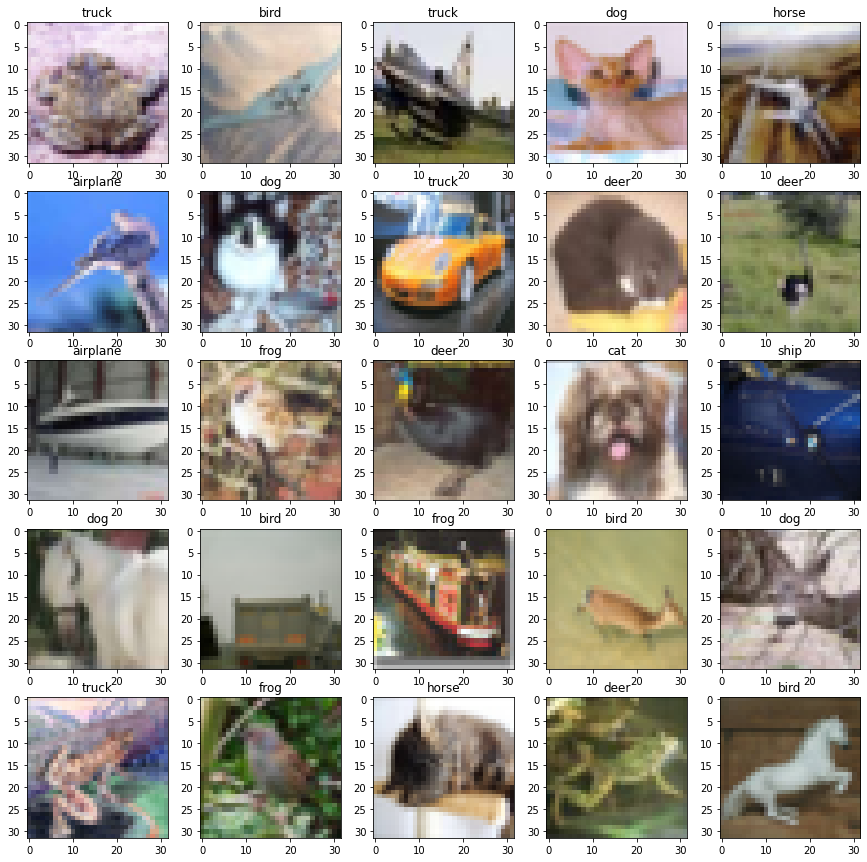

In [13]:
matplotlib_imshow(classes, false_predicted, plt, False)

# Plot The Graph for train and test 

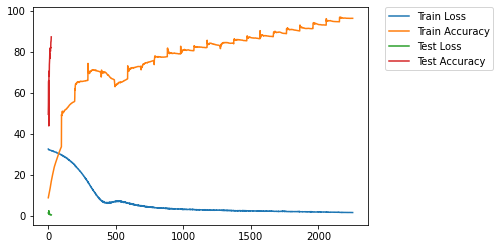

In [14]:
plottesttraingraph([x.item() for x in train_losses], train_acc, test_losses, test_acc, plt, True)